<a href="https://colab.research.google.com/github/IndioP/Projeto_Ciencia_Dados/blob/main/preprocessamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

##Acidentes

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
acidentes=pd.read_csv("/content/drive/MyDrive/ciencia-de-dados/dataset preprocessado/acidentes_transito_2015_2021.csv",delimiter = ';')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (11,25,26,27,28,29,30,31,32,33,34,35,36,37) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#dando a primeira olhada nos dados...
acidentes.head()

,DATA,HORA,NATUREZA_ACIDENTE,SITUACAO,BAIRRO,ENDERECO,NUMERO,DETALHE_ENDERECO_ACIDENTE,COMPLEMENTO,BAIRRO_CRUZAMENTO,NUM_SEMAFORO,SENTIDO_VIA,TIPO,DESCRICAO,AUTO,MOTO,CICLOM,CICLISTA,PEDESTRE,ONIBUS,CAMINHAO,VIATURA,OUTROS,VITIMAS,VITIMASFATAIS,ACIDENTE_VERIFICADO,TEMPO_CLIMA,SITUACAO_SEMAFORO,SINALIZACAO,CONDICAO_VIA,CONSERVACAO_VIA,PONTO_CONTROLE,SITUACAO_PLACA,VELOCIDADE_MAX_VIA,MAO_DIRECAO,DIVISAO_VIA1,DIVISAO_VIA2,DIVISAO_VIA3,NATUREZA,ENDERECO_CRUZAMENTO,NUMERO_CRUZAMENTO,REFERENCIA_CRUZAMENTO
0,2015-12-03,11:36:00.000,SEM VÍTIMA,CANCELADA,CASA AMARELA,AV NORTE,NaN,NaN,SENTIDO SUBURBIO E/F AO SESC,NaN,NaN,NaN,COLISÃO,COLISÃO SEM VITIMAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-06-01,06:35:00.000,SEM VÍTIMA,FINALIZADA,ENCRUZILHADA,EST DE BELEM,NaN,NaN,IGREJA BATISTA MEMORIAL DE BELÉM,NaN,NaN,NaN,COLISÃO,SEM VÍTIMAS.,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-06-01,08:04:00.000,SEM VÍTIMA,FINALIZADA,BOA VIAGEM,RUA ERNESTO DE PAULA SANTOS,NaN,NaN,SEMAFORO Nº217,NaN,NaN,NaN,COLISÃO,SEM VITIMA,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-06-01,08:06:00.000,SEM VÍTIMA,FINALIZADA,AFOGADOS,AV SUL,NaN,NaN,AO LADO DA ESTAÇAO LARGO DA PAZ,NaN,NaN,NaN,COLISÃO,COLISAO S/V,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-06-01,08:13:00.000,SEM VÍTIMA,CANCELADA,MADALENA,RUA BENFICA,NaN,NaN,EM FRENTE AO CLUBE INTERNACIONAL,NaN,NaN,NaN,COLISÃO,GM RIBEIRO JA NO LOCAL VT 05,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#olhando os tipos que foram inferidos inicialmente no pandas
acidentes.dtypes

DATA                          object
HORA                          object
NATUREZA_ACIDENTE             object
SITUACAO                      object
BAIRRO                        object
ENDERECO                      object
NUMERO                        object
DETALHE_ENDERECO_ACIDENTE     object
COMPLEMENTO                   object
BAIRRO_CRUZAMENTO             object
NUM_SEMAFORO                 float64
SENTIDO_VIA                   object
TIPO                          object
DESCRICAO                     object
AUTO                         float64
MOTO                         float64
CICLOM                       float64
CICLISTA                     float64
PEDESTRE                     float64
ONIBUS                       float64
CAMINHAO                     float64
VIATURA                      float64
OUTROS                       float64
VITIMAS                      float64
VITIMASFATAIS                float64
ACIDENTE_VERIFICADO           object
TEMPO_CLIMA                   object
S

In [6]:
#como pouquissimos dados de hora estão ausentes, optamos por exclui-los o que não prejudicaria muito a nossa amostra...
acidentes.dropna(subset = ["HORA"], inplace=True)
acidentes['HORA'] = acidentes['HORA'].astype(str)
acidentes['HORA'] = acidentes['HORA'].str.slice(stop = 2)
#pegamos os primeiros 2 caracteres pois queriamos discretizar os horarios em manhã tarde e noite, para isso a hora seria o suficiente.

In [7]:
#apos um tempo apanhando, descobrimos que existia alguns dados invalidos na hora que estavam prejudicando a nossa analise,
#então nos tivemos que nos livrar deles
acidentes['HORA'].unique()

array(['11', '06', '08', '09', '10', '12', '13', '14', '15', '16', '17',
       '18', '07', '19', '20', '21', '22', '01', '05', '23', '00', '03',
       '04', '02', 'ju', '29', 'CI', 'M', 'MA', '.', '48'], dtype=object)

In [8]:
#olhando a quantidade de dados invalidos que foram excluidos para medir o impacto que isso traria para a nossa analise
len(acidentes['HORA'])

58015

In [9]:
#nos livrando dos dados invalidos da coluna hora
#como podemos observar, não existia um numero expressivo de dados invalidos então simplesmente excluilos não seria um grande problema
acidentes = acidentes[acidentes.HORA != 'ju']
acidentes = acidentes[acidentes.HORA != '29']
acidentes = acidentes[acidentes.HORA != 'CI']
acidentes = acidentes[acidentes.HORA != 'M']
acidentes = acidentes[acidentes.HORA != 'MA']
acidentes = acidentes[acidentes.HORA != '.']
acidentes = acidentes[acidentes.HORA != '48']

len(acidentes['HORA'])


58008

In [10]:
#convertendo as horas para inteiro, pois posteriormente vamos usar o comparador de < <= > e >=...
acidentes['HORA'] = acidentes['HORA'].astype(int)

In [11]:
#discretizando as horas em periodos do dia
acidentes['PERIODO_DO_DIA'] = 'manha'
acidentes.loc[(acidentes['HORA'] < 6),'PERIODO_DO_DIA'] = 'madrugada'
acidentes.loc[((acidentes['HORA'] >= 6) & (acidentes['HORA'] < 12)),'PERIODO_DO_DIA'] = 'manha'
acidentes.loc[((acidentes['HORA'] >= 12) & (acidentes['HORA'] < 18)),'PERIODO_DO_DIA'] = 'tarde'
acidentes.loc[(acidentes['HORA'] > 18),'PERIODO_DO_DIA'] = 'noite'
acidentes['PERIODO_DO_DIA'] = acidentes['PERIODO_DO_DIA'].astype(str)

In [12]:
#ajustando tipos dos dados

acidentes['DATA'] = pd.to_datetime(acidentes['DATA'], format='%Y-%m-%d', errors='ignore')
#acidentes['HORA'] = pd.to_datetime(acidentes['HORA'], format='%H:%M:%S', errors = 'ignore')

acidentes = acidentes.astype({'NATUREZA_ACIDENTE':'category','SITUACAO':'category','BAIRRO':'category','ENDERECO':'category','NUMERO':'category','DETALHE_ENDERECO_ACIDENTE':'category','COMPLEMENTO':'category','BAIRRO_CRUZAMENTO':'category','NUM_SEMAFORO':'category','SENTIDO_VIA':'category','TIPO':'category','DESCRICAO':'category','AUTO':'float','MOTO':'float','CICLOM':'float','CICLISTA':'float','PEDESTRE':'float','ONIBUS':'float','CAMINHAO':'float','VIATURA':'float','OUTROS':'float','VITIMAS':'float','VITIMASFATAIS':'float','ACIDENTE_VERIFICADO':'category','TEMPO_CLIMA':'category','SITUACAO_SEMAFORO':'category','SINALIZACAO':'category','CONDICAO_VIA':'category','CONSERVACAO_VIA':'category','PONTO_CONTROLE':'category','SITUACAO_PLACA':'category','VELOCIDADE_MAX_VIA':'category','MAO_DIRECAO':'category','DIVISAO_VIA1':'category','DIVISAO_VIA2':'category','DIVISAO_VIA3':'category','NATUREZA':'category','ENDERECO_CRUZAMENTO':'category','NUMERO_CRUZAMENTO':'category','REFERENCIA_CRUZAMENTO':'category'})

In [13]:
#visualizando os tipos depois do cast
acidentes.dtypes

DATA                         datetime64[ns]
HORA                                  int64
NATUREZA_ACIDENTE                  category
SITUACAO                           category
BAIRRO                             category
ENDERECO                           category
NUMERO                             category
DETALHE_ENDERECO_ACIDENTE          category
COMPLEMENTO                        category
BAIRRO_CRUZAMENTO                  category
NUM_SEMAFORO                       category
SENTIDO_VIA                        category
TIPO                               category
DESCRICAO                          category
AUTO                                float64
MOTO                                float64
CICLOM                              float64
CICLISTA                            float64
PEDESTRE                            float64
ONIBUS                              float64
CAMINHAO                            float64
VIATURA                             float64
OUTROS                          

In [14]:
#discretizando também o dia da semana baseado na data do dia
#vamos usar isso para futuras comparações
acidentes['DIA_DA_SEMANA'] = acidentes['DATA'].dt.dayofweek
acidentes.loc[(acidentes['DIA_DA_SEMANA'] == 0),'DIA_DA_SEMANA'] = 'Segunda'
acidentes.loc[(acidentes['DIA_DA_SEMANA'] == 1),'DIA_DA_SEMANA'] = 'Terca'
acidentes.loc[(acidentes['DIA_DA_SEMANA'] == 2),'DIA_DA_SEMANA'] = 'Quarta'
acidentes.loc[(acidentes['DIA_DA_SEMANA'] == 3),'DIA_DA_SEMANA'] = 'Quinta'
acidentes.loc[(acidentes['DIA_DA_SEMANA'] == 4),'DIA_DA_SEMANA'] = 'Sexta'
acidentes.loc[(acidentes['DIA_DA_SEMANA'] == 5),'DIA_DA_SEMANA'] = 'Sabado'
acidentes.loc[(acidentes['DIA_DA_SEMANA'] == 6),'DIA_DA_SEMANA'] = 'Domingo'

tratando os dados ausentes


In [15]:
#dando uma olhada em quais colunas possuem mais dados ausentes
print(acidentes.isnull().sum()/len(acidentes))

DATA                         0.000000
HORA                         0.000000
NATUREZA_ACIDENTE            0.007275
SITUACAO                     0.000931
BAIRRO                       0.005637
ENDERECO                     0.004068
NUMERO                       0.544890
DETALHE_ENDERECO_ACIDENTE    0.855468
COMPLEMENTO                  0.062319
BAIRRO_CRUZAMENTO            0.129189
NUM_SEMAFORO                 0.915581
SENTIDO_VIA                  0.776738
TIPO                         0.000983
DESCRICAO                    0.220383
AUTO                         0.093470
MOTO                         0.745277
CICLOM                       0.992984
CICLISTA                     0.985209
PEDESTRE                     0.978382
ONIBUS                       0.851951
CAMINHAO                     0.900496
VIATURA                      0.988295
OUTROS                       0.988536
VITIMAS                      0.004723
VITIMASFATAIS                0.997380
ACIDENTE_VERIFICADO          0.749414
TEMPO_CLIMA 

*** As colunas abaixo vão ser retiradas pela falta de valores ser muito elevada em relação ao dataset***

NUMERO além de que essa granularidade seria muito especifica para o nosso foco

DETALHE_ENDERECO_ACIDENTE é um valor muito subjetivo e pouco padronizado

NUM_SEMAFORO é um numero que não significa muita coisa pro nosso foco

SENTIDO_VIA seria muito especifico para os testes que a gente vai fazer

DIVISAO_VIA2 existem poucas vias com 3 faixas

DIVISAO_VIA3 existem poucas vias com 4 faixas

NATUREZA essa coluna ta vazia

ENDERECO_CRUZAMENTO

NUMERO_CRUZAMENTO

REFERENCIA_CRUZAMENTO


In [16]:
excluidos = acidentes[[ 'NUMERO','DETALHE_ENDERECO_ACIDENTE','NUM_SEMAFORO','SENTIDO_VIA','DIVISAO_VIA2','DIVISAO_VIA3','NATUREZA','ENDERECO_CRUZAMENTO','NUMERO_CRUZAMENTO','REFERENCIA_CRUZAMENTO']]
excluidos.head()

,NUMERO,DETALHE_ENDERECO_ACIDENTE,NUM_SEMAFORO,SENTIDO_VIA,DIVISAO_VIA2,DIVISAO_VIA3,NATUREZA,ENDERECO_CRUZAMENTO,NUMERO_CRUZAMENTO,REFERENCIA_CRUZAMENTO
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#apagando algumas tabelas que não eram tão interessantes pra gente
acidentes = acidentes.drop([ 'NUMERO','DETALHE_ENDERECO_ACIDENTE','NUM_SEMAFORO','SENTIDO_VIA','DIVISAO_VIA2','DIVISAO_VIA3','NATUREZA','ENDERECO_CRUZAMENTO','NUMERO_CRUZAMENTO','REFERENCIA_CRUZAMENTO'], axis=1)

In [18]:
#olhando a tabela apos a exclusão das colunas desnecessarias
acidentes.head()

,DATA,HORA,NATUREZA_ACIDENTE,SITUACAO,BAIRRO,ENDERECO,COMPLEMENTO,BAIRRO_CRUZAMENTO,TIPO,DESCRICAO,AUTO,MOTO,CICLOM,CICLISTA,PEDESTRE,ONIBUS,CAMINHAO,VIATURA,OUTROS,VITIMAS,VITIMASFATAIS,ACIDENTE_VERIFICADO,TEMPO_CLIMA,SITUACAO_SEMAFORO,SINALIZACAO,CONDICAO_VIA,CONSERVACAO_VIA,PONTO_CONTROLE,SITUACAO_PLACA,VELOCIDADE_MAX_VIA,MAO_DIRECAO,DIVISAO_VIA1,PERIODO_DO_DIA,DIA_DA_SEMANA
0,2015-12-03,11,SEM VÍTIMA,CANCELADA,CASA AMARELA,AV NORTE,SENTIDO SUBURBIO E/F AO SESC,NaN,COLISÃO,COLISÃO SEM VITIMAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,manha,Quinta
1,2015-06-01,6,SEM VÍTIMA,FINALIZADA,ENCRUZILHADA,EST DE BELEM,IGREJA BATISTA MEMORIAL DE BELÉM,NaN,COLISÃO,SEM VÍTIMAS.,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,manha,Segunda
2,2015-06-01,8,SEM VÍTIMA,FINALIZADA,BOA VIAGEM,RUA ERNESTO DE PAULA SANTOS,SEMAFORO Nº217,NaN,COLISÃO,SEM VITIMA,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,manha,Segunda
3,2015-06-01,8,SEM VÍTIMA,FINALIZADA,AFOGADOS,AV SUL,AO LADO DA ESTAÇAO LARGO DA PAZ,NaN,COLISÃO,COLISAO S/V,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,manha,Segunda
4,2015-06-01,8,SEM VÍTIMA,CANCELADA,MADALENA,RUA BENFICA,EM FRENTE AO CLUBE INTERNACIONAL,NaN,COLISÃO,GM RIBEIRO JA NO LOCAL VT 05,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,manha,Segunda


In [19]:
#percebemos que a coluna NATUREZA_ACIDENTE tem um dado redundante que poderia nos ajudar a repopular a coluna vitima e vitia fatal
acidentes.NATUREZA_ACIDENTE.unique()

['SEM VÍTIMA', 'COM VÍTIMA', 'VÍTIMA FATAL', NaN, 'ENTRADA E SAÍDA', 'APOIO']
Categories (5, object): ['SEM VÍTIMA', 'COM VÍTIMA', 'VÍTIMA FATAL', 'ENTRADA E SAÍDA', 'APOIO']

In [20]:
#usando os valores da tabela NATUREZA_ACIDENTE para repopular a coluna vitimas fatais
acidentes.loc[(acidentes['VITIMASFATAIS'].isnull()) & (acidentes['NATUREZA_ACIDENTE'] == 'VÍTIMA FATAL'),'VITIMASFATAIS'] = 1.0

In [21]:
#como não podemos assumir nada a respeito dessas linhas, vamos zerar o valor de vitimas fatais
acidentes.loc[(acidentes['VITIMASFATAIS'].isnull()),'VITIMASFATAIS'] = 0.0

In [22]:
#já melhoramos a ausencia de valores na coluna de vitimas fatais
print(acidentes.isnull().sum()/len(acidentes))

DATA                   0.000000
HORA                   0.000000
NATUREZA_ACIDENTE      0.007275
SITUACAO               0.000931
BAIRRO                 0.005637
ENDERECO               0.004068
COMPLEMENTO            0.062319
BAIRRO_CRUZAMENTO      0.129189
TIPO                   0.000983
DESCRICAO              0.220383
AUTO                   0.093470
MOTO                   0.745277
CICLOM                 0.992984
CICLISTA               0.985209
PEDESTRE               0.978382
ONIBUS                 0.851951
CAMINHAO               0.900496
VIATURA                0.988295
OUTROS                 0.988536
VITIMAS                0.004723
VITIMASFATAIS          0.000000
ACIDENTE_VERIFICADO    0.749414
TEMPO_CLIMA            0.739553
SITUACAO_SEMAFORO      0.742880
SINALIZACAO            0.744415
CONDICAO_VIA           0.740381
CONSERVACAO_VIA        0.744087
PONTO_CONTROLE         0.764929
SITUACAO_PLACA         0.764860
VELOCIDADE_MAX_VIA     0.921666
MAO_DIRECAO            0.744518
DIVISAO_

In [23]:
#vamos fazer o mesmo para as vitimas leves
acidentes.loc[(acidentes['VITIMAS'].isnull()) & (acidentes['NATUREZA_ACIDENTE'] == 'COM VÍTIMA'),'VITIMAS'] = 1.0

In [24]:
acidentes.loc[(acidentes['VITIMAS'].isnull()) ,'VITIMAS'] = 0.0

In [25]:
print(acidentes.isnull().sum()/len(acidentes))

DATA                   0.000000
HORA                   0.000000
NATUREZA_ACIDENTE      0.007275
SITUACAO               0.000931
BAIRRO                 0.005637
ENDERECO               0.004068
COMPLEMENTO            0.062319
BAIRRO_CRUZAMENTO      0.129189
TIPO                   0.000983
DESCRICAO              0.220383
AUTO                   0.093470
MOTO                   0.745277
CICLOM                 0.992984
CICLISTA               0.985209
PEDESTRE               0.978382
ONIBUS                 0.851951
CAMINHAO               0.900496
VIATURA                0.988295
OUTROS                 0.988536
VITIMAS                0.000000
VITIMASFATAIS          0.000000
ACIDENTE_VERIFICADO    0.749414
TEMPO_CLIMA            0.739553
SITUACAO_SEMAFORO      0.742880
SINALIZACAO            0.744415
CONDICAO_VIA           0.740381
CONSERVACAO_VIA        0.744087
PONTO_CONTROLE         0.764929
SITUACAO_PLACA         0.764860
VELOCIDADE_MAX_VIA     0.921666
MAO_DIRECAO            0.744518
DIVISAO_

In [26]:
#aqui vamos zerar os valores ausentes das colunas dos elementos envolvidos no acidente
acidentes['AUTO'] = acidentes['AUTO'].fillna(0)
acidentes['MOTO'] = acidentes['MOTO'].fillna(0)
acidentes['CICLOM'] = acidentes['CICLOM'].fillna(0)
acidentes['CICLISTA'] = acidentes['CICLISTA'].fillna(0)
acidentes['PEDESTRE'] = acidentes['PEDESTRE'].fillna(0)
acidentes['ONIBUS'] = acidentes['ONIBUS'].fillna(0)
acidentes['CAMINHAO'] = acidentes['CAMINHAO'].fillna(0)
acidentes['VIATURA'] = acidentes['VIATURA'].fillna(0)
acidentes['OUTROS'] = acidentes['OUTROS'].fillna(0)

In [27]:
print(acidentes.isnull().sum()/len(acidentes))

DATA                   0.000000
HORA                   0.000000
NATUREZA_ACIDENTE      0.007275
SITUACAO               0.000931
BAIRRO                 0.005637
ENDERECO               0.004068
COMPLEMENTO            0.062319
BAIRRO_CRUZAMENTO      0.129189
TIPO                   0.000983
DESCRICAO              0.220383
AUTO                   0.000000
MOTO                   0.000000
CICLOM                 0.000000
CICLISTA               0.000000
PEDESTRE               0.000000
ONIBUS                 0.000000
CAMINHAO               0.000000
VIATURA                0.000000
OUTROS                 0.000000
VITIMAS                0.000000
VITIMASFATAIS          0.000000
ACIDENTE_VERIFICADO    0.749414
TEMPO_CLIMA            0.739553
SITUACAO_SEMAFORO      0.742880
SINALIZACAO            0.744415
CONDICAO_VIA           0.740381
CONSERVACAO_VIA        0.744087
PONTO_CONTROLE         0.764929
SITUACAO_PLACA         0.764860
VELOCIDADE_MAX_VIA     0.921666
MAO_DIRECAO            0.744518
DIVISAO_

In [28]:
acidentes.head()

,DATA,HORA,NATUREZA_ACIDENTE,SITUACAO,BAIRRO,ENDERECO,COMPLEMENTO,BAIRRO_CRUZAMENTO,TIPO,DESCRICAO,AUTO,MOTO,CICLOM,CICLISTA,PEDESTRE,ONIBUS,CAMINHAO,VIATURA,OUTROS,VITIMAS,VITIMASFATAIS,ACIDENTE_VERIFICADO,TEMPO_CLIMA,SITUACAO_SEMAFORO,SINALIZACAO,CONDICAO_VIA,CONSERVACAO_VIA,PONTO_CONTROLE,SITUACAO_PLACA,VELOCIDADE_MAX_VIA,MAO_DIRECAO,DIVISAO_VIA1,PERIODO_DO_DIA,DIA_DA_SEMANA
0,2015-12-03,11,SEM VÍTIMA,CANCELADA,CASA AMARELA,AV NORTE,SENTIDO SUBURBIO E/F AO SESC,NaN,COLISÃO,COLISÃO SEM VITIMAS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,manha,Quinta
1,2015-06-01,6,SEM VÍTIMA,FINALIZADA,ENCRUZILHADA,EST DE BELEM,IGREJA BATISTA MEMORIAL DE BELÉM,NaN,COLISÃO,SEM VÍTIMAS.,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,manha,Segunda
2,2015-06-01,8,SEM VÍTIMA,FINALIZADA,BOA VIAGEM,RUA ERNESTO DE PAULA SANTOS,SEMAFORO Nº217,NaN,COLISÃO,SEM VITIMA,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,manha,Segunda
3,2015-06-01,8,SEM VÍTIMA,FINALIZADA,AFOGADOS,AV SUL,AO LADO DA ESTAÇAO LARGO DA PAZ,NaN,COLISÃO,COLISAO S/V,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,manha,Segunda
4,2015-06-01,8,SEM VÍTIMA,CANCELADA,MADALENA,RUA BENFICA,EM FRENTE AO CLUBE INTERNACIONAL,NaN,COLISÃO,GM RIBEIRO JA NO LOCAL VT 05,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,manha,Segunda


In [29]:
acidentes['TIPO'].unique()

['COLISÃO', 'CHOQUE', 'ATROPELAMENTO ANIMAL', 'QUEDA DE ÁRVORE', 'ATROPELAMENTO', ..., 'CHOQUE VEÍCULO PARADO', 'ABALROAMENTO TRANSVERSAL', 'COLISÃO FRONTAL', 'CHOQUE OBJETO FIXO', 'SUBURBIO']
Length: 24
Categories (23, object): ['COLISÃO', 'CHOQUE', 'ATROPELAMENTO ANIMAL', 'QUEDA DE ÁRVORE', ...,
                          'ABALROAMENTO TRANSVERSAL', 'COLISÃO FRONTAL', 'CHOQUE OBJETO FIXO', 'SUBURBIO']

In [30]:
acidentes['DESCRICAO'].unique()

['COLISÃO SEM VITIMAS', 'SEM VÍTIMAS.', 'SEM VITIMA', 'COLISAO S/V', 'GM RIBEIRO JA NO LOCAL VT 05', ..., 'COM VITIMA AGUARDANDO SAMU / CONDUTOR DO AUTO..., 'COLISÃO 2 AUTOS - SEGUIDA DE CAPOTAMENTO - C/..., 'COM VITIMAS / BOMBEIROS NO LOCAL', 'COLISÃO AUTO X MOTO / VT 14 NO LOCAL', 'COLISÃO CARRO X MOTO / CARRO SE EVADIU DO LOC...]
Length: 11610
Categories (11609, object): ['COLISÃO SEM VITIMAS', 'SEM VÍTIMAS.', 'SEM VITIMA', 'COLISAO S/V', ...,
                             'COLISÃO 2 AUTOS - SEGUIDA DE CAPOTAMENTO - C/..., 'COM VITIMAS / BOMBEIROS NO LOCAL',
                             'COLISÃO AUTO X MOTO / VT 14 NO LOCAL', 'COLISÃO CARRO X MOTO / CARRO SE EVADIU DO LOC...]

In [31]:
print(acidentes.isnull().sum()/len(acidentes))

DATA                   0.000000
HORA                   0.000000
NATUREZA_ACIDENTE      0.007275
SITUACAO               0.000931
BAIRRO                 0.005637
ENDERECO               0.004068
COMPLEMENTO            0.062319
BAIRRO_CRUZAMENTO      0.129189
TIPO                   0.000983
DESCRICAO              0.220383
AUTO                   0.000000
MOTO                   0.000000
CICLOM                 0.000000
CICLISTA               0.000000
PEDESTRE               0.000000
ONIBUS                 0.000000
CAMINHAO               0.000000
VIATURA                0.000000
OUTROS                 0.000000
VITIMAS                0.000000
VITIMASFATAIS          0.000000
ACIDENTE_VERIFICADO    0.749414
TEMPO_CLIMA            0.739553
SITUACAO_SEMAFORO      0.742880
SINALIZACAO            0.744415
CONDICAO_VIA           0.740381
CONSERVACAO_VIA        0.744087
PONTO_CONTROLE         0.764929
SITUACAO_PLACA         0.764860
VELOCIDADE_MAX_VIA     0.921666
MAO_DIRECAO            0.744518
DIVISAO_

Tentando criar uma serie temporal para aplicar a normalização e aplicação de outliers

In [32]:
acidentes['NUM'] = 1

acidentes2 = pd.DataFrame(acidentes.groupby(["DATA","DIA_DA_SEMANA"])["NUM"].count())
acidentes2 = acidentes2.reset_index()
acidentes2.head()

,DATA,DIA_DA_SEMANA,NUM
0,2015-06-01,Segunda,39
1,2015-06-02,Terca,49
2,2015-06-03,Quarta,46
3,2015-06-04,Quinta,28
4,2015-06-05,Sexta,40


In [33]:
segunda = acidentes2[acidentes2.DIA_DA_SEMANA == 'Segunda']
segunda.describe() 

,NUM
count,293.000000
mean,31.105802
std,13.758151
min,1.000000
25%,24.000000
50%,34.000000
75%,41.000000
max,62.000000


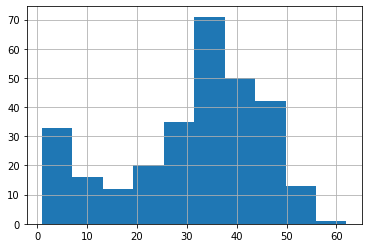

In [34]:
(segunda['NUM']).hist()

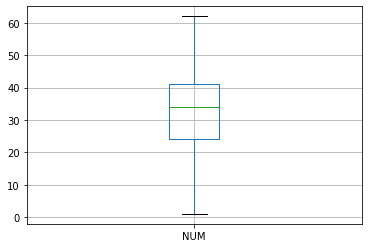

In [35]:
segunda.boxplot(column=['NUM'])

In [36]:
IQR = segunda['NUM'].describe()[6] - segunda['NUM'].describe()[4]
segunda = segunda[(segunda.NUM > (segunda['NUM'].describe()[4] - IQR)) & (segunda.NUM < (segunda['NUM'].describe()[6] + IQR))]

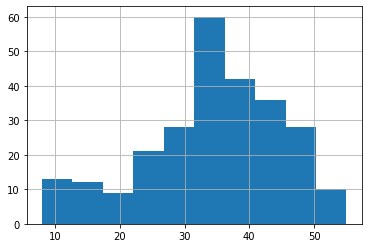

In [37]:
(segunda['NUM']).hist()

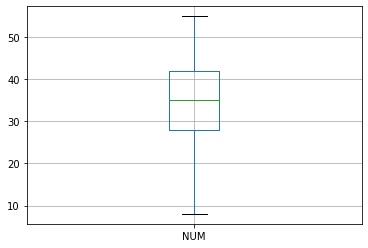

In [38]:
segunda.boxplot(column=['NUM'])

In [39]:
terca = acidentes2[acidentes2.DIA_DA_SEMANA == 'Terca']
terca.describe() 

,NUM
count,294.000000
mean,31.517007
std,13.420149
min,1.000000
25%,26.000000
50%,35.000000
75%,40.000000
max,59.000000


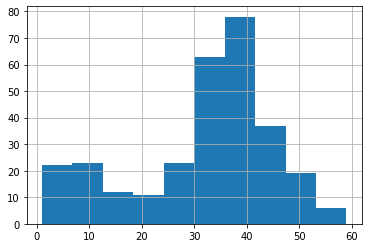

In [40]:
(terca['NUM']).hist()

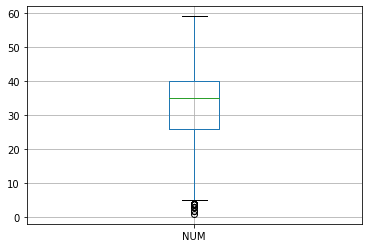

In [41]:
terca.boxplot(column=['NUM'])

In [42]:
IQR = terca['NUM'].describe()[6] - terca['NUM'].describe()[4]
terca = terca[(terca.NUM > (terca['NUM'].describe()[4] - IQR)) & (terca.NUM < (terca['NUM'].describe()[6] + IQR))]

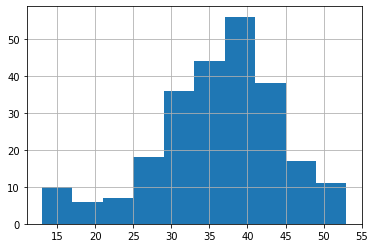

In [43]:
(terca['NUM']).hist()

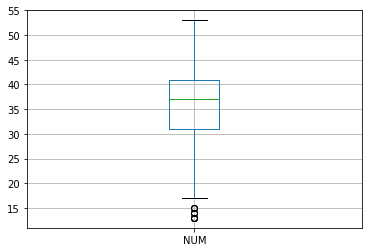

In [44]:
terca.boxplot(column=['NUM'])

In [51]:
quarta = acidentes2[acidentes2.DIA_DA_SEMANA == 'Quarta']
quarta.describe() 

,NUM
count,294.000000
mean,31.414966
std,12.999261
min,1.000000
25%,26.000000
50%,34.000000
75%,41.000000
max,59.000000


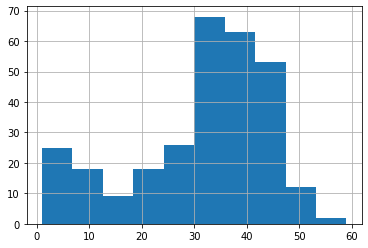

In [52]:
(quarta['NUM']).hist()

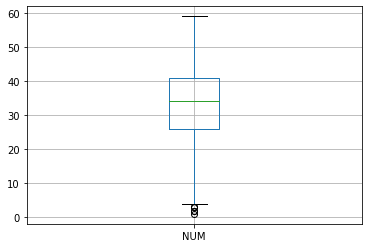

In [53]:
quarta.boxplot(column=['NUM'])

In [54]:
IQR = quarta['NUM'].describe()[6] - quarta['NUM'].describe()[4]
quarta = quarta[(quarta.NUM > (quarta['NUM'].describe()[4] - IQR)) & (quarta.NUM < (quarta['NUM'].describe()[6] + IQR))]

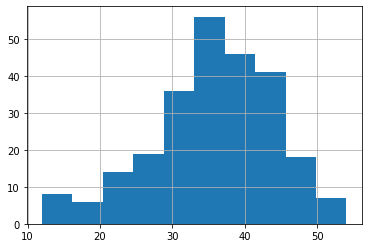

In [55]:
(quarta['NUM']).hist()

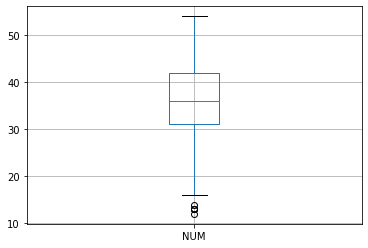

In [56]:
quarta.boxplot(column=['NUM'])

In [57]:
quinta = acidentes2[acidentes2.DIA_DA_SEMANA == 'Quinta']
quinta.describe() 

,NUM
count,294.000000
mean,31.578231
std,13.260028
min,1.000000
25%,27.000000
50%,34.500000
75%,41.000000
max,65.000000


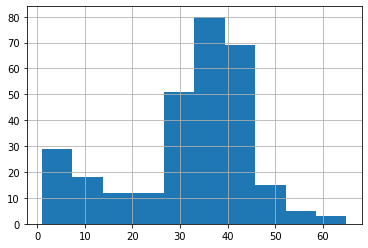

In [58]:
(quinta['NUM']).hist()

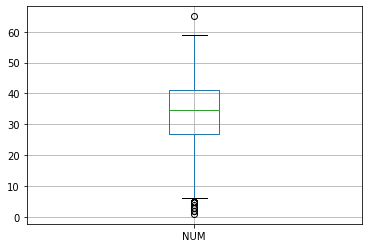

In [59]:
quinta.boxplot(column=['NUM'])

In [60]:
IQR = quinta['NUM'].describe()[6] - quinta['NUM'].describe()[4]
quinta = quinta[(quinta.NUM > (quinta['NUM'].describe()[4] - IQR)) & (quinta.NUM < (quinta['NUM'].describe()[6] + IQR))]

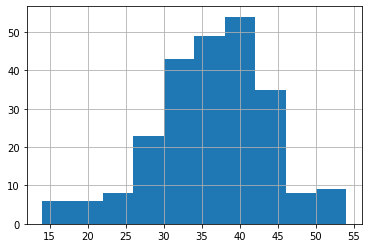

In [61]:
(quinta['NUM']).hist()

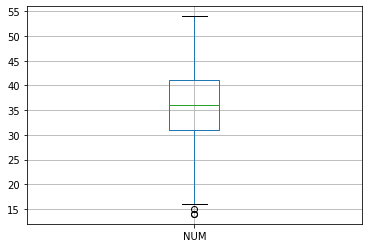

In [62]:
quinta.boxplot(column=['NUM'])

In [63]:
sexta = acidentes2[acidentes2.DIA_DA_SEMANA == 'Sexta']
sexta.describe() 

,NUM
count,294.000000
mean,32.095238
std,14.581925
min,2.000000
25%,23.250000
50%,36.000000
75%,42.000000
max,63.000000


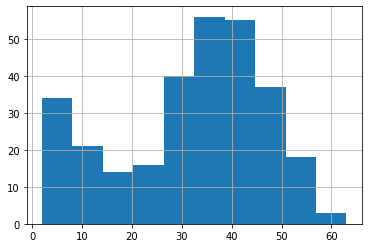

In [64]:
(sexta['NUM']).hist()

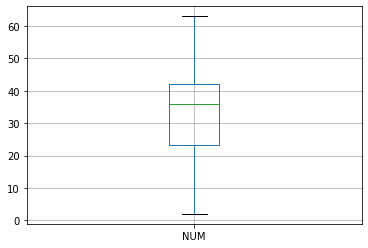

In [65]:
sexta.boxplot(column=['NUM'])

In [66]:
IQR = sexta['NUM'].describe()[6] - sexta['NUM'].describe()[4]
sexta = sexta[(sexta.NUM > (sexta['NUM'].describe()[4] - IQR)) & (sexta.NUM < (sexta['NUM'].describe()[6] + IQR))]

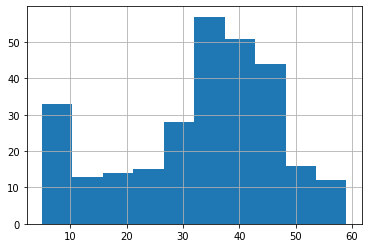

In [67]:
(sexta['NUM']).hist()

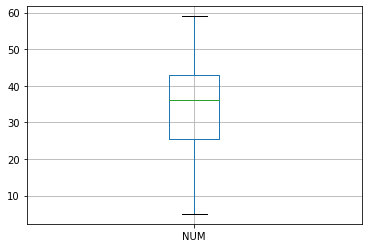

In [68]:
sexta.boxplot(column=['NUM'])

In [69]:
sabado = acidentes2[acidentes2.DIA_DA_SEMANA == 'Sabado']
sabado.describe() 

,NUM
count,294.000000
mean,23.418367
std,9.813542
min,1.000000
25%,19.000000
50%,25.000000
75%,29.750000
max,48.000000


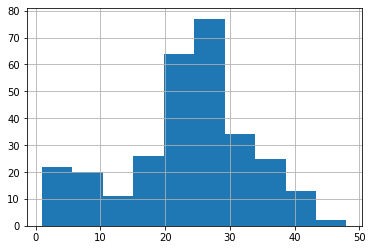

In [70]:
(sabado['NUM']).hist()

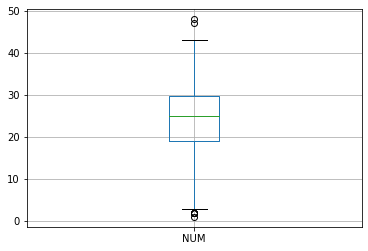

In [71]:
sabado.boxplot(column=['NUM'])

In [72]:
IQR = sabado['NUM'].describe()[6] - sabado['NUM'].describe()[4]
sabado = sabado[(sabado.NUM > (sabado['NUM'].describe()[4] - IQR)) & (sabado.NUM < (sabado['NUM'].describe()[6] + IQR))]

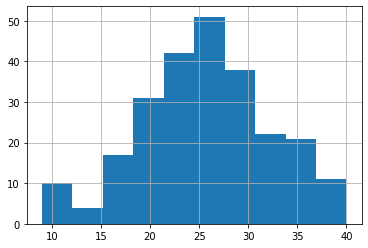

In [73]:
(sabado['NUM']).hist()

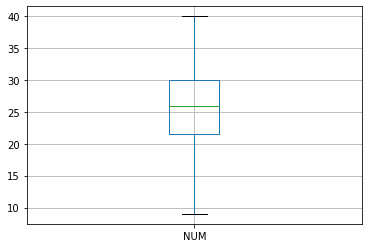

In [74]:
sabado.boxplot(column=['NUM'])

In [75]:
domingo = acidentes2[acidentes2.DIA_DA_SEMANA == 'Domingo']
domingo.describe() 

,NUM
count,294.000000
mean,16.282313
std,6.926126
min,1.000000
25%,12.250000
50%,17.000000
75%,21.000000
max,36.000000


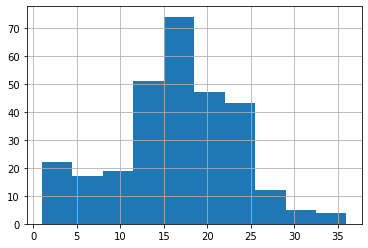

In [76]:
(domingo['NUM']).hist()

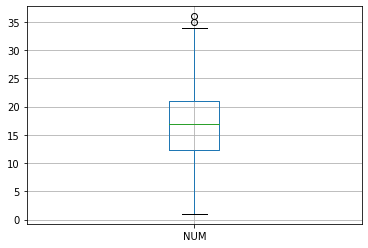

In [77]:
domingo.boxplot(column=['NUM'])

In [78]:
IQR = domingo['NUM'].describe()[6] - domingo['NUM'].describe()[4]
domingo = domingo[(domingo.NUM > (domingo['NUM'].describe()[4] - IQR)) & (domingo.NUM < (domingo['NUM'].describe()[6] + IQR))]

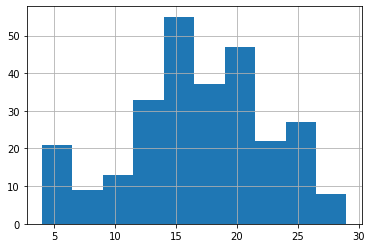

In [79]:
(domingo['NUM']).hist()

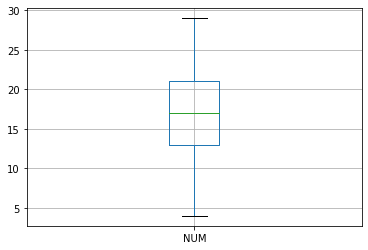

In [80]:
domingo.boxplot(column=['NUM'])

In [ ]:
comercios = pd.read_csv("/content/drive/MyDrive/ciencia-de-dados/dataset preprocessado/comercios_2015_2021_trimestre.csv",delimiter = ';')

In [ ]:
comercios.head() 

,ANO,TRIMESTRE,RAZAO_SOCIAL,NOME_FANTASIA,CNPJ,PORTE,DATA_INICIO_OPERACAO,SITUACAO,ATIVIDADE,CEP,UF,LOCALIDADE,BAIRRO,LOGRADOURO,DATA_GERACAO_CERTIFICADO,DATA_VALIDADE_CERTIFICADO,CODIGO_CERTIFICADO,CODIGO_DESCRICAO_CNAE,NATUREZA_JURIDICA
0,2021,1,"MELLO, RIBEIRO & MELLO LTDA",China in Box Rosarinho,00.874.830/0001-48,EMPRESA DE PEQUENO PORTE,25/10/1995,Em Operação,"Restaurante, Cafeteria, Bar e Similares",52041-305,PE,Recife,Rosarinho,Amaro Coutinho,23/03/2020 09:27,23/03/2022 09:27,00.874.830/0001-48,"5611-2/03 - LANCHONETES, CASAS DE CHÁ, DE SUCO...",Sociedade Empresária Limitada
1,2021,1,M DAS DORES DE SOUZA CHURRASCARIA,Restaurante e Churrascaria da Dodora,01.219.705/0001-67,MICROEMPRESA,28/05/1996,Em Operação,"Restaurante, Cafeteria, Bar e Similares",55690-000,PE,Barra de Guabiraba,-,Av. Eneias Texeira de Carvalho n 101,01/04/2019 10:44,01/04/2021 10:44,01.219.705/0001-67,5611-2/02 - BARES E OUTROS ESTABELECIMENTOS ES...,Empresário Individual
2,2021,1,POUSADA DO AMPARO - EIRELI,POUSADA DO AMPARO,01.790.381/0001-12,MICROEMPRESA,06/04/1997,Em Operação,"Restaurante, Cafeteria, Bar e Similares",53025-080,PE,Olinda,Amparo,do Amparo,11/06/2020 08:17,11/06/2022 08:17,01.790.381/0001-12,5611-2/01 - RESTAURANTES E SIMILARES,Empresa Individual de Responsabilidade Limitad...
3,2021,1,NEZ BISTRO COMERCIO DE BEBIDAS E RESTAURANTE E...,NEZ BISTRO,02.217.561/0001-72,MICROEMPRESA,30/10/1997,Em Operação,"Restaurante, Cafeteria, Bar e Similares",52061-420,PE,Recife,Casa Forte,de Casa Forte,16/07/2020 12:44,16/07/2022 12:44,02.217.561/0001-72,5611-2/01 - RESTAURANTES E SIMILARES,Empresa Individual de Responsabilidade Limitad...
4,2021,1,ATLANTICA HOTELS INTERNATIONAL BRASIL LTDA,RESTAURANTE NABUCO,02.223.966/0036-43,DEMAIS,03/10/2003,Em Operação,"Restaurante, Cafeteria, Bar e Similares",51111-000,PE,Recife,Boa Viagem,Boa Viagem,19/12/2019 07:58,19/12/2021 07:58,02.223.966/0036-43,5611-2/01 - RESTAURANTES E SIMILARES,Sociedade Empresária Limitada


In [ ]:
comercios.dtypes

ANO                           int64
TRIMESTRE                     int64
RAZAO_SOCIAL                 object
NOME_FANTASIA                object
CNPJ                         object
PORTE                        object
DATA_INICIO_OPERACAO         object
SITUACAO                     object
ATIVIDADE                    object
CEP                          object
UF                           object
LOCALIDADE                   object
BAIRRO                       object
LOGRADOURO                   object
DATA_GERACAO_CERTIFICADO     object
DATA_VALIDADE_CERTIFICADO    object
CODIGO_CERTIFICADO           object
CODIGO_DESCRICAO_CNAE        object
NATUREZA_JURIDICA            object
dtype: object

In [ ]:
excluidos = comercios[['ANO','TRIMESTRE','RAZAO_SOCIAL','NOME_FANTASIA','CNPJ','PORTE','SITUACAO','UF','DATA_GERACAO_CERTIFICADO','DATA_VALIDADE_CERTIFICADO','CODIGO_CERTIFICADO',	'CODIGO_DESCRICAO_CNAE',	'NATUREZA_JURIDICA']]
excluidos.head()

,ANO,TRIMESTRE,RAZAO_SOCIAL,NOME_FANTASIA,CNPJ,PORTE,SITUACAO,UF,DATA_GERACAO_CERTIFICADO,DATA_VALIDADE_CERTIFICADO,CODIGO_CERTIFICADO,CODIGO_DESCRICAO_CNAE,NATUREZA_JURIDICA
0,2021,1,"MELLO, RIBEIRO & MELLO LTDA",China in Box Rosarinho,00.874.830/0001-48,EMPRESA DE PEQUENO PORTE,Em Operação,PE,23/03/2020 09:27,23/03/2022 09:27,00.874.830/0001-48,"5611-2/03 - LANCHONETES, CASAS DE CHÁ, DE SUCO...",Sociedade Empresária Limitada
1,2021,1,M DAS DORES DE SOUZA CHURRASCARIA,Restaurante e Churrascaria da Dodora,01.219.705/0001-67,MICROEMPRESA,Em Operação,PE,01/04/2019 10:44,01/04/2021 10:44,01.219.705/0001-67,5611-2/02 - BARES E OUTROS ESTABELECIMENTOS ES...,Empresário Individual
2,2021,1,POUSADA DO AMPARO - EIRELI,POUSADA DO AMPARO,01.790.381/0001-12,MICROEMPRESA,Em Operação,PE,11/06/2020 08:17,11/06/2022 08:17,01.790.381/0001-12,5611-2/01 - RESTAURANTES E SIMILARES,Empresa Individual de Responsabilidade Limitad...
3,2021,1,NEZ BISTRO COMERCIO DE BEBIDAS E RESTAURANTE E...,NEZ BISTRO,02.217.561/0001-72,MICROEMPRESA,Em Operação,PE,16/07/2020 12:44,16/07/2022 12:44,02.217.561/0001-72,5611-2/01 - RESTAURANTES E SIMILARES,Empresa Individual de Responsabilidade Limitad...
4,2021,1,ATLANTICA HOTELS INTERNATIONAL BRASIL LTDA,RESTAURANTE NABUCO,02.223.966/0036-43,DEMAIS,Em Operação,PE,19/12/2019 07:58,19/12/2021 07:58,02.223.966/0036-43,5611-2/01 - RESTAURANTES E SIMILARES,Sociedade Empresária Limitada


In [ ]:
comercios = comercios.drop(['ANO','TRIMESTRE','RAZAO_SOCIAL','NOME_FANTASIA','CNPJ','PORTE','SITUACAO','UF','DATA_GERACAO_CERTIFICADO','DATA_VALIDADE_CERTIFICADO','CODIGO_CERTIFICADO',	'CODIGO_DESCRICAO_CNAE',	'NATUREZA_JURIDICA'], axis=1)

In [ ]:
comercios.head()

,DATA_INICIO_OPERACAO,ATIVIDADE,CEP,LOCALIDADE,BAIRRO,LOGRADOURO
0,25/10/1995,"Restaurante, Cafeteria, Bar e Similares",52041-305,Recife,Rosarinho,Amaro Coutinho
1,28/05/1996,"Restaurante, Cafeteria, Bar e Similares",55690-000,Barra de Guabiraba,-,Av. Eneias Texeira de Carvalho n 101
2,06/04/1997,"Restaurante, Cafeteria, Bar e Similares",53025-080,Olinda,Amparo,do Amparo
3,30/10/1997,"Restaurante, Cafeteria, Bar e Similares",52061-420,Recife,Casa Forte,de Casa Forte
4,03/10/2003,"Restaurante, Cafeteria, Bar e Similares",51111-000,Recife,Boa Viagem,Boa Viagem


In [ ]:
comercios['DATA_INICIO_OPERACAO'] = pd.to_datetime(comercios['DATA_INICIO_OPERACAO'], format='%Y-%m-%d', errors='ignore')
comercios = comercios.astype({'ATIVIDADE':'category',	'CEP':'category',	'LOCALIDADE':'category',	'BAIRRO':'category', 'LOGRADOURO':'category'})

In [ ]:
print(comercios.isnull().sum()/len(comercios))

DATA_INICIO_OPERACAO    0.117073
ATIVIDADE               0.000000
CEP                     0.000000
LOCALIDADE              0.000000
BAIRRO                  0.000000
LOGRADOURO              0.000000
dtype: float64


In [ ]:
comercios.dropna(subset = ["DATA_INICIO_OPERACAO"], inplace=True)

In [ ]:
print(comercios.isnull().sum()/len(comercios))

DATA_INICIO_OPERACAO    0.0
ATIVIDADE               0.0
CEP                     0.0
LOCALIDADE              0.0
BAIRRO                  0.0
LOGRADOURO              0.0
dtype: float64


**Equipamento velocidade vias**

In [ ]:
equipamento_velocidade_vias = pd.read_csv("/content/drive/MyDrive/ciencia-de-dados/dataset preprocessado/equipamento_velocidade_vias_2016_2021.csv",delimiter = ';')

In [ ]:
equipamento_velocidade_vias.head()

,ANO,EQUIPAMENTO,TIPO,LOGRADOURO,VELOCIDADE_VIA,LATITUDE,LONGITUDE
0,2016,5941,Lombada,"AV. MAL. MASCARENHAS DE MORAES, EM FRENTE AERO...",60 km/h,-8.130970,-34.916161
1,2016,5942,Lombada,"AV. MAL. MASCARENHAS DE MORAES, EM FRENTE AERO...",60 km/h,-8.130647,-34.915886
2,2016,5943,Lombada,AV. BOA VIAGEM - TERCEIRO JARDIM,60 km/h,-8.107843,-34.888161
3,2016,5944,Lombada,"DEFRONTE A PCA. GOV. PAULO GUERRA, CABANGA - S...",60 km/h,-8.080121,-34.892187
4,2016,5945,Lombada,"APOS PONTE AGAMENON MAGALHAES, CABANGA - SENT....",60 km/h,-8.080820,-34.891159


In [ ]:
excluidos = equipamento_velocidade_vias[['TIPO']]
excluidos.head()

,TIPO
0,Lombada
1,Lombada
2,Lombada
3,Lombada
4,Lombada


In [ ]:
equipamento_velocidade_vias = equipamento_velocidade_vias.drop(['TIPO'], axis=1)

In [ ]:
equipamento_velocidade_vias = equipamento_velocidade_vias.astype({'ANO':'category',	'EQUIPAMENTO':'category',	'LOGRADOURO':'category',	'VELOCIDADE_VIA':'category', 'LATITUDE':'category','LONGITUDE':'category'})

In [ ]:
equipamento_velocidade_vias.dtypes

ANO               category
EQUIPAMENTO       category
LOGRADOURO        category
VELOCIDADE_VIA    category
LATITUDE          category
LONGITUDE         category
dtype: object

In [ ]:
print(equipamento_velocidade_vias.isnull().sum()/len(equipamento_velocidade_vias))

ANO               0.0
EQUIPAMENTO       0.0
LOGRADOURO        0.0
VELOCIDADE_VIA    0.0
LATITUDE          0.0
LONGITUDE         0.0
dtype: float64


**dataset de multas**

In [ ]:
multas = pd.read_csv("/content/drive/MyDrive/ciencia-de-dados/dataset preprocessado/relatorio_multas_2015_2021.csv",delimiter = ';')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
multas.head()

,DATAINFRACAO,HORAINFRACAO,DATAIMPLANTACAO,AGENTEEQUIPAMENTO,INFRACAO,DESCRICAOINFRACAO,AMPAROLEGAL,LOCALCOMETIMENTO
0,2015/10/26 00:00:00.000,08:42:00,2015/11/03 00:00:00.000,Código 6 - AUTOS NO TALÃO MANUAL,5541,Estacionar o veículo em desacordo com as condi...,"Art. 181, Inc. XVII",AV PORTUGAL EM FRENTE AO IMOVEL N 89
1,2015/10/26 00:00:00.000,08:45:00,2015/11/03 00:00:00.000,Código 6 - AUTOS NO TALÃO MANUAL,5541,Estacionar o veículo em desacordo com as condi...,"Art. 181, Inc. XVII",AV PORTUGAL EM FRENTE AO IMOVEL N 89
2,2015/10/26 00:00:00.000,08:48:00,2015/11/03 00:00:00.000,Código 6 - AUTOS NO TALÃO MANUAL,5525,Estacionar o veículo na contramão de direção.,"Art. 181, Inc. XV",AV PORTUGAL EM FRENTE AO IMOVEL N 101
3,2015/10/26 00:00:00.000,08:55:00,2015/11/03 00:00:00.000,Código 6 - AUTOS NO TALÃO MANUAL,5550,Estacionar o veículo em locais e horários proi...,"Art. 181, Inc. XVIII",RUA PACIFICO DOS SANTOS EM FRENTE AO IMOVEL N 124
4,2015/10/26 00:00:00.000,09:10:00,2015/11/03 00:00:00.000,Código 6 - AUTOS NO TALÃO MANUAL,7366,Dirigir o veículo utilizando-se de telefone ce...,"Art. 252, Inc. VI",AV GOV AGAMENON MAGALHAES EM FRENTE AO SEMAFOR...


In [ ]:
excluidos = multas[['DATAIMPLANTACAO', 'AGENTEEQUIPAMENTO',	'AMPAROLEGAL']]
excluidos.head()

,DATAIMPLANTACAO,AGENTEEQUIPAMENTO,AMPAROLEGAL
0,2015/11/03 00:00:00.000,Código 6 - AUTOS NO TALÃO MANUAL,"Art. 181, Inc. XVII"
1,2015/11/03 00:00:00.000,Código 6 - AUTOS NO TALÃO MANUAL,"Art. 181, Inc. XVII"
2,2015/11/03 00:00:00.000,Código 6 - AUTOS NO TALÃO MANUAL,"Art. 181, Inc. XV"
3,2015/11/03 00:00:00.000,Código 6 - AUTOS NO TALÃO MANUAL,"Art. 181, Inc. XVIII"
4,2015/11/03 00:00:00.000,Código 6 - AUTOS NO TALÃO MANUAL,"Art. 252, Inc. VI"


In [ ]:
multas = multas.drop(['DATAIMPLANTACAO', 'AGENTEEQUIPAMENTO',	'AMPAROLEGAL'], axis=1)

In [ ]:
multas['DATAINFRACAO'] = pd.to_datetime(multas['DATAINFRACAO'], format='%Y-%m-%d', errors='ignore')
multas['HORAINFRACAO'] = pd.to_datetime(multas['HORAINFRACAO'], format='%H:%M:%S', errors = 'ignore')
multas = multas.astype({'INFRACAO':'category', 'DESCRICAOINFRACAO':'category','LOCALCOMETIMENTO':'category'})

In [ ]:
multas.dtypes

DATAINFRACAO         datetime64[ns]
HORAINFRACAO                 object
INFRACAO                   category
DESCRICAOINFRACAO          category
LOCALCOMETIMENTO           category
dtype: object

In [ ]:
print(multas.isnull().sum()/len(multas))

DATAINFRACAO         1.157818e-06
HORAINFRACAO         0.000000e+00
INFRACAO             5.789091e-07
DESCRICAOINFRACAO    1.157818e-06
LOCALCOMETIMENTO     4.052363e-06
dtype: float64


In [ ]:
multas.dropna(subset = ["DATAINFRACAO","HORAINFRACAO","INFRACAO","DESCRICAOINFRACAO","LOCALCOMETIMENTO"], inplace=True)

In [ ]:
print(multas.isnull().sum()/len(multas))

DATAINFRACAO         0.0
HORAINFRACAO         0.0
INFRACAO             0.0
DESCRICAOINFRACAO    0.0
LOCALCOMETIMENTO     0.0
dtype: float64


**velocidades**

In [ ]:
velocidades = pd.read_csv("/content/drive/MyDrive/ciencia-de-dados/dataset preprocessado/velocidade_vias_media_15minutos_2016_2021.csv",delimiter = ';')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
velocidades.head()

,ANO,MES,EQUIPAMENTO,FAIXA,DATA,HORA,MINUTOS_INTERVALO,QTD_0A10KM,QTD_11A20KM,QTD_21A30KM,QTD_31A40KM,QTD_41A50KM,QTD_51A60KM,QTD_61A70KM,QTD_71A80KM,QTD_81A90KM,QTD_91A100KM,QTD_ACIMADE100KM
0,2016,1.0,FS002REC,1.0,2016-01-01,0.0,0-15,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016,1.0,FS002REC,1.0,2016-01-01,0.0,16-30,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2016,1.0,FS002REC,1.0,2016-01-01,0.0,31-45,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016,1.0,FS002REC,1.0,2016-01-01,0.0,46-59,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2016,1.0,FS002REC,1.0,2016-01-01,1.0,0-15,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
velocidades['DATA'] = pd.to_datetime(velocidades['DATA'], format='%Y-%m-%d', errors='ignore')

velocidades = velocidades.astype({'ANO':'category',	'MES':'category',	'EQUIPAMENTO':'category',	'FAIXA':'category',	'HORA':'category',	'MINUTOS_INTERVALO':'category',	'QTD_0A10KM':'float',	'QTD_11A20KM':'float',	'QTD_21A30KM':'float',	'QTD_31A40KM':'float',	'QTD_41A50KM':'float',	'QTD_51A60KM':'float',	'QTD_61A70KM':'float',	'QTD_71A80KM':'float',	'QTD_81A90KM':'float',	'QTD_91A100KM':'float',	'QTD_ACIMADE100KM':'float'})

In [ ]:
print(velocidades.isnull().sum()/len(velocidades))

ANO                  0.000000e+00
MES                  1.806735e-07
EQUIPAMENTO          1.264715e-06
FAIXA                1.445388e-06
DATA                 1.626062e-06
HORA                 1.987409e-06
MINUTOS_INTERVALO    2.168082e-06
QTD_0A10KM           2.710103e-06
QTD_11A20KM          3.252123e-06
QTD_21A30KM          3.432797e-06
QTD_31A40KM          3.794144e-06
QTD_41A50KM          4.155491e-06
QTD_51A60KM          4.155491e-06
QTD_61A70KM          4.336164e-06
QTD_71A80KM          4.336164e-06
QTD_81A90KM          4.697511e-06
QTD_91A100KM         4.697511e-06
QTD_ACIMADE100KM     5.058858e-06
dtype: float64


In [ ]:
velocidades.dropna(subset = ["ANO", "MES", "EQUIPAMENTO", "FAIXA", "DATA", "HORA", "MINUTOS_INTERVALO", "QTD_0A10KM", "QTD_11A20KM", "QTD_21A30KM", "QTD_31A40KM", "QTD_41A50KM", "QTD_51A60KM", "QTD_61A70KM", "QTD_71A80KM", "QTD_81A90KM", "QTD_91A100KM", "QTD_ACIMADE100KM"],inplace=True)

In [ ]:
  print(velocidades.isnull().sum()/len(velocidades))

ANO                  0.0
MES                  0.0
EQUIPAMENTO          0.0
FAIXA                0.0
DATA                 0.0
HORA                 0.0
MINUTOS_INTERVALO    0.0
QTD_0A10KM           0.0
QTD_11A20KM          0.0
QTD_21A30KM          0.0
QTD_31A40KM          0.0
QTD_41A50KM          0.0
QTD_51A60KM          0.0
QTD_61A70KM          0.0
QTD_71A80KM          0.0
QTD_81A90KM          0.0
QTD_91A100KM         0.0
QTD_ACIMADE100KM     0.0
dtype: float64


#**precisa verificar se o codigo do equipamento no dataset acima é igual ao codigo do equipamento do dataset das multas**